In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
import pickle
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import matplotlib.pylab as plt

In [3]:
data=pd.read_csv("customers.csv")
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [4]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [5]:
data.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [6]:
data.shape

(10695, 11)

In [7]:
data.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [8]:
data=data.dropna(axis=0)

In [9]:
data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [10]:
data.shape

(8819, 11)

In [11]:
data.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [12]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
data['Ever_Married'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
data['Graduated'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
data['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],
      dtype=object)

In [16]:
data['Spending_Score'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [17]:
data['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', 'Cat_5'],
      dtype=object)

In [18]:
data['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [19]:
from sklearn.preprocessing import OrdinalEncoder
categories_list=[['Male', 'Female'],['No', 'Yes'],['No', 'Yes'],['Healthcare', 'Engineer', 'Lawyer', 'Artist', 'Doctor',
       'Homemaker', 'Entertainment', 'Marketing', 'Executive'],['Low', 'High', 'Average']]
enc=OrdinalEncoder(categories=categories_list)

In [20]:
data1=data.copy()

In [21]:
data1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']]=enc.fit_transform(data1[['Gender','Ever_Married','Graduated','Profession','Spending_Score']])
data1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0.0,0.0,22,0.0,0.0,1.0,0.0,4.0,Cat_4,D
2,466315,1.0,1.0,67,1.0,1.0,1.0,0.0,1.0,Cat_6,B
3,461735,0.0,1.0,67,1.0,2.0,0.0,1.0,2.0,Cat_6,B
5,461319,0.0,1.0,56,0.0,3.0,0.0,2.0,2.0,Cat_6,C
6,460156,0.0,0.0,32,1.0,0.0,1.0,0.0,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
10689,467950,1.0,0.0,35,1.0,6.0,1.0,0.0,2.0,Cat_6,D
10690,467954,0.0,0.0,29,0.0,0.0,9.0,0.0,4.0,Cat_6,B
10691,467958,1.0,0.0,35,1.0,4.0,1.0,0.0,1.0,Cat_6,A
10693,467961,0.0,1.0,47,1.0,8.0,1.0,1.0,5.0,Cat_4,C


In [22]:
data1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [24]:
data1['Segmentation']=le.fit_transform(data1['Segmentation'])
data1

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0.0,0.0,22,0.0,0.0,1.0,0.0,4.0,Cat_4,3
2,466315,1.0,1.0,67,1.0,1.0,1.0,0.0,1.0,Cat_6,1
3,461735,0.0,1.0,67,1.0,2.0,0.0,1.0,2.0,Cat_6,1
5,461319,0.0,1.0,56,0.0,3.0,0.0,2.0,2.0,Cat_6,2
6,460156,0.0,0.0,32,1.0,0.0,1.0,0.0,3.0,Cat_6,2
...,...,...,...,...,...,...,...,...,...,...,...
10689,467950,1.0,0.0,35,1.0,6.0,1.0,0.0,2.0,Cat_6,3
10690,467954,0.0,0.0,29,0.0,0.0,9.0,0.0,4.0,Cat_6,1
10691,467958,1.0,0.0,35,1.0,4.0,1.0,0.0,1.0,Cat_6,0
10693,467961,0.0,1.0,47,1.0,8.0,1.0,1.0,5.0,Cat_4,2


In [25]:
data1.dtypes

ID                   int64
Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Var_1               object
Segmentation         int64
dtype: object

In [26]:
data1=data1.drop('ID',axis=1)
data1=data1.drop('Var_1',axis=1)
data1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,0.0,0.0,22,0.0,0.0,1.0,0.0,4.0,3
2,1.0,1.0,67,1.0,1.0,1.0,0.0,1.0,1
3,0.0,1.0,67,1.0,2.0,0.0,1.0,2.0,1
5,0.0,1.0,56,0.0,3.0,0.0,2.0,2.0,2
6,0.0,0.0,32,1.0,0.0,1.0,0.0,3.0,2
...,...,...,...,...,...,...,...,...,...
10689,1.0,0.0,35,1.0,6.0,1.0,0.0,2.0,3
10690,0.0,0.0,29,0.0,0.0,9.0,0.0,4.0,1
10691,1.0,0.0,35,1.0,4.0,1.0,0.0,1.0,0
10693,0.0,1.0,47,1.0,8.0,1.0,1.0,5.0,2


In [27]:
data1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [28]:
X=data1.iloc[:,:-1].values
y1=data1.iloc[:,-1].values.reshape(-1,1)
X.shape


(8819, 8)

In [29]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
onehot

OneHotEncoder()

In [30]:
onehot.fit(y1)

OneHotEncoder()

In [31]:
y1.shape

(8819, 1)

In [32]:
y=onehot.transform(y1).toarray()

In [33]:
y.shape

(8819, 4)

In [34]:
y[0],y1[0]

(array([0., 0., 0., 1.]), array([3]))

In [35]:
X.shape

(8819, 8)

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.33,random_state=50)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [38]:
scaler.fit(xtrain[:,2].reshape(-1,1))

MinMaxScaler()

In [39]:
xtrain_scaled=np.copy(xtrain)
xtest_scaled=np.copy(xtest)
xtrain_scaled[:,2]=scaler.transform(xtrain[:,2].reshape(-1,1)).reshape(-1)
xtest_scaled[:,2]=scaler.transform(xtest[:,2].reshape(-1,1)).reshape(-1)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization


In [41]:
ai_brain=Sequential([
    Dense(512,input_shape=(8,)),
    Dense(512,activation='relu'),
    Dense(4,activation='softmax')
])
ai_brain.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
early_stop=EarlyStopping(monitor='val_loss',patience=2)
ai_brain.fit(x=xtrain_scaled,y=ytrain,epochs=800,batch_size=256,validation_data=(xtest_scaled,ytest),)

Epoch 1/800
24/24 [==============================] - 1s 18ms/step - loss: 1.3252 - accuracy: 0.3912 - val_loss: 1.3096 - val_accuracy: 0.4047
Epoch 2/800
24/24 [==============================] - 0s 10ms/step - loss: 1.2635 - accuracy: 0.4186 - val_loss: 1.2596 - val_accuracy: 0.4122
Epoch 3/800
24/24 [==============================] - 0s 12ms/step - loss: 1.2430 - accuracy: 0.4367 - val_loss: 1.2754 - val_accuracy: 0.4246
Epoch 4/800
24/24 [==============================] - 0s 15ms/step - loss: 1.2490 - accuracy: 0.4348 - val_loss: 1.2505 - val_accuracy: 0.4322
Epoch 5/800
24/24 [==============================] - 0s 16ms/step - loss: 1.2247 - accuracy: 0.4507 - val_loss: 1.2499 - val_accuracy: 0.4246
Epoch 6/800
24/24 [==============================] - 0s 16ms/step - loss: 1.2220 - accuracy: 0.4480 - val_loss: 1.2368 - val_accuracy: 0.4414
Epoch 7/800
24/24 [==============================] - 0s 16ms/step - loss: 1.2190 - accuracy: 0.4558 - val_loss: 1.2340 - val_accuracy: 0.4346
Epoch 

In [42]:
metrics = pd.DataFrame(ai_brain.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.325179,0.391165,1.309563,0.404672
1,1.263478,0.418585,1.259580,0.412229
2,1.243035,0.436696,1.275426,0.424596
3,1.249011,0.434834,1.250532,0.432154
4,1.224713,0.450745,1.249942,0.424596
...,...,...,...,...
795,0.861811,0.634902,1.713985,0.416352
796,0.848725,0.639980,1.735243,0.408107
797,0.845774,0.641165,1.742231,0.428375
798,0.840097,0.639133,1.728878,0.418756


<Axes: >

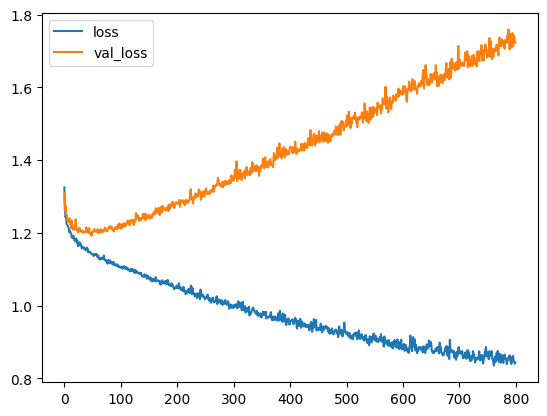

In [43]:
metrics[['loss','val_loss']].plot()

In [44]:
x_test_predictions = np.argmax(ai_brain.predict(xtest_scaled), axis=1)
x_test_predictions

91/91 [==============================] - 0s 1ms/step


array([0, 2, 2, ..., 1, 2, 3])

In [45]:
x_test_predictions.shape

(2911,)

In [46]:
y_test_truevalue = np.argmax(ytest,axis=1)
y_test_truevalue

array([0, 1, 2, ..., 1, 1, 1])

In [47]:
y_test_truevalue.shape

(2911,)

In [48]:
print(confusion_matrix(y_test_truevalue,x_test_predictions))

[[260 170 149 178]
 [171 168 219 128]
 [ 94 139 356  97]
 [164  95  95 428]]


In [49]:
print(classification_report(y_test_truevalue,x_test_predictions))

              precision    recall  f1-score   support

           0       0.38      0.34      0.36       757
           1       0.29      0.24      0.27       686
           2       0.43      0.52      0.47       686
           3       0.52      0.55      0.53       782

    accuracy                           0.42      2911
   macro avg       0.41      0.41      0.41      2911
weighted avg       0.41      0.42      0.41      2911



In [50]:
x_single_prediction = np.argmax(ai_brain.predict(xtest_scaled[1:2,:]), axis=1)
print(x_single_prediction)
print(le.inverse_transform(x_single_prediction))

1/1 [==============================] - 0s 15ms/step
[2]
['C']
